<a href="https://colab.research.google.com/github/AmirNBA9/Binance.API.Csharp.Client/blob/master/KNN_suggestionbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read data with seprate columns
users = pd.read_csv('/content/drive/MyDrive/ML/BX-Users.csv', sep=';', on_bad_lines='skip', encoding= 'latin-1')
books = pd.read_csv('/content/drive/MyDrive/ML/BX-Books.csv', sep=';', on_bad_lines='skip', encoding= 'latin-1')
ratings = pd.read_csv("/content/drive/MyDrive/ML/BX-Book-Ratings.csv", sep=';', on_bad_lines='skip', encoding= 'latin-1')

# find and split columns
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']
users.columns = ['userID', 'Location', 'Age']
ratings.columns = ['userID', 'ISBN', 'bookRating']

print(books.shape)
print(list(books.columns))
print(users.shape)
print(list(users.columns))
print(ratings.shape)
print(list(ratings.columns))

users.info()
books.info()
ratings.info()

<ipython-input-17-2308e26404db>:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('/content/drive/MyDrive/ML/BX-Books.csv', sep=';', on_bad_lines='skip', encoding= 'latin-1')


(271360, 8)
['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']
(278858, 3)
['userID', 'Location', 'Age']
(1149780, 3)
['userID', 'ISBN', 'bookRating']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   userID    278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ISBN               271360 non-null  object
 1   bookTitle          271360 non-null  object
 2   bookAuthor         271359 non-null  object
 3   yearOfPublication  271360 non-null  object
 4   publisher       

**بررسي ديتا**
##كاربرها
- RowCount: 272230 not null data
- Structure: User-ID;"Location";"Age"

##كتاب ها
- RowCount: 228148 not null data
- Structure: ISBN;"Book-Title";"Book-Author";"Year-Of-Publication";"Publisher";"Image-URL-S";"Image-URL-M";"Image-URL-L"

##امتيازات كتاب ها
- RowCount: 1149775 not null record
- Structure: User-ID;"ISBN";"Book-Rating"

# مطالعه بيشتر ديتاها

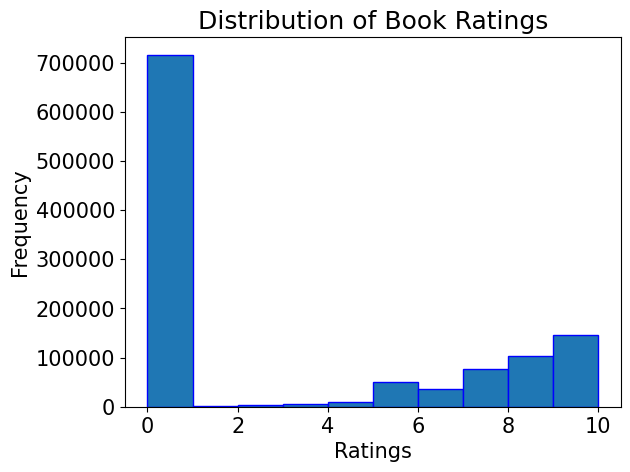

In [18]:
# پلات كردن داده هاي يونيك براي رتبه كتاب ها
# تبدیل داده‌ها به یک DataFrame
df = pd.DataFrame(ratings)

# رسم نمودار توزیع امتیازها
plt.hist(df["bookRating"], bins=[0,1, 2, 3, 4, 5, 6,7,8,9,10], edgecolor='blue')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Book Ratings')
plt.show()

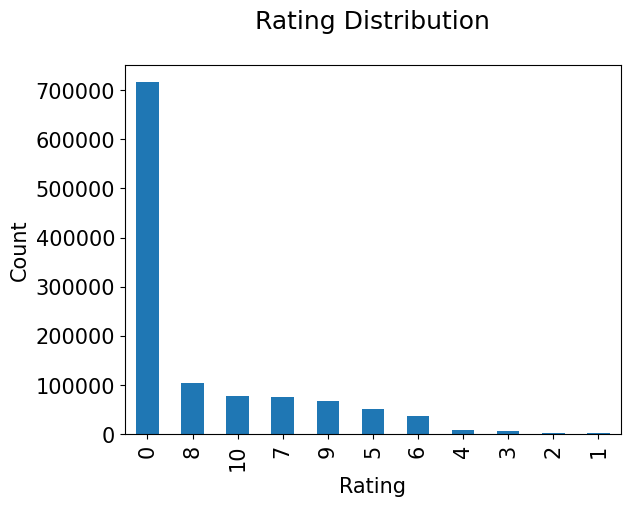

In [19]:
plt.rc("font", size=15)
ratings.bookRating.value_counts(sort=True).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig('system1.png', bbox_inches='tight')
plt.show()

In [20]:
print(books.shape)
print(list(books.columns))

print(users.shape)
print(list(users.columns))

print(ratings.shape)
print(list(ratings.columns))

(271360, 8)
['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']
(278858, 3)
['userID', 'Location', 'Age']
(1149780, 3)
['userID', 'ISBN', 'bookRating']


In [21]:
# Join ratings and books dataframes
rating_books = pd.merge(ratings,books,on='ISBN')
rating_users = pd.merge(ratings,users,on='userID')

# Shape of the data
rating_books.shape
rating_users.shape

# Take 80 % data as sample
rating_books_sample = rating_books.sample(frac=.01, random_state=1)

# Shape of the sample data
rating_books_sample.shape

# Create Item-user matrix using pivot_table()
rating_books_pivot = rating_books_sample.pivot_table(index='bookTitle', columns='userID', values='bookRating').fillna(0)

# Show top-5 records
rating_books_pivot.head()

userID,254,432,507,625,638,726,730,805,834,876,...,278314,278418,278554,278563,278582,278663,278771,278838,278843,278851
bookTitle,,,,,,,,,,,,,,,,,,,,,
Garfield Bigger and Better (Garfield (Numbered Paperback)),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Good Wives: Image and Reality in the Lives of Women in Northern New England, 1650-1750",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Little Comic Shop of Horrors (Give Yourself Goosebumps, Book 17)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Summonings: Books of Magic, Vol. 2",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
' Mein verwundetes Herz'. Das Leben der Lilli Jahn 1900 - 1944.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
# تعداد امتیازاتی که هر کتاب دریافت کرده را چاپ کنید
for books, ratings in rating_books.items():
    print(f"کتاب {books} تعداد امتیازات: {ratings}")

کتاب userID تعداد امتیازات: 0          276725
1            2313
2            6543
3            8680
4           10314
            ...  
1031131    276688
1031132    276688
1031133    276690
1031134    276704
1031135    276704
Name: userID, Length: 1031136, dtype: int64
کتاب ISBN تعداد امتیازات: 0          034545104X
1          034545104X
2          034545104X
3          034545104X
4          034545104X
              ...    
1031131    0517145553
1031132    1575660792
1031133    0590907301
1031134    0679752714
1031135    0806917695
Name: ISBN, Length: 1031136, dtype: object
کتاب bookRating تعداد امتیازات: 0          0
1          5
2          0
3          5
4          9
          ..
1031131    0
1031132    7
1031133    0
1031134    0
1031135    5
Name: bookRating, Length: 1031136, dtype: int64
کتاب bookTitle تعداد امتیازات: 0                                       Flesh Tones: A Novel
1                                       Flesh Tones: A Novel
2                                       Fle

In [23]:
# تعداد امتیازاتی که هر کاربر برای کتاب ها ثبت کرده است را چاپ کنید
for user, ratings in rating_users.items():
    print(f"کاربر {users} تعداد امتیازات: {len(ratings)}")

کاربر         userID                            Location   Age
0            1                  nyc, new york, usa   NaN
1            2           stockton, california, usa  18.0
2            3     moscow, yukon territory, russia   NaN
3            4           porto, v.n.gaia, portugal  17.0
4            5  farnborough, hants, united kingdom   NaN
...        ...                                 ...   ...
278853  278854               portland, oregon, usa   NaN
278854  278855  tacoma, washington, united kingdom  50.0
278855  278856           brampton, ontario, canada   NaN
278856  278857           knoxville, tennessee, usa   NaN
278857  278858                dublin, n/a, ireland   NaN

[278858 rows x 3 columns] تعداد امتیازات: 1149780
کاربر         userID                            Location   Age
0            1                  nyc, new york, usa   NaN
1            2           stockton, california, usa  18.0
2            3     moscow, yukon territory, russia   NaN
3            4           

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

# پیش پردازش داده‌ها
# ...

# تقسیم داده‌ها به دو بخش آموزش و تست
train_data, test_data = train_test_split(rating_books , test_size=0.2, random_state=42)

# تعیین متغیر هدف و ویژگی‌های ورودی برای آموزش
X_train = train_data.drop(columns=['ISBN'])
y_train = train_data['bookRating']

# تعیین متغیر هدف و ویژگی‌های ورودی برای تست
X_test = test_data.drop(columns=['ISBN'])
y_test = test_data['bookRating']

# آموزش مدل با استفاده از الگوریتم KNN
k = 3
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train, y_train)

# ارزیابی مدل با استفاده از MAE و RMSE
y_pred = knn.predict(X_test)
mae = np.mean(np.abs(y_test - y_pred))
rmse = np.sqrt(np.mean(np.square(y_test - y_pred)))
print("MAE:", mae)
print("RMSE:", rmse)

ValueError: ignored

چرك نويس ها

In [28]:
# Import NearestNeighbors
from sklearn.neighbors import NearestNeighbors

# Build NearestNeighbors Object
model_nn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=7, n_jobs=-1)

# Fit the NearestNeighbor
model_nn.fit(rating_books_pivot)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=7)

In [29]:
# Get top 10 nearest neighbors
indices=model_nn.kneighbors(rating_books_pivot.loc[['10 Secrets for Success and Inner Peace']], 10, return_distance=False)

# Print the recommended books
print("Recommended Books:")
print("==================")
for index, value in enumerate(rating_books_pivot.index[indices][0]):
    print((index+1),". ",value)

Recommended Books:
1 .  10 Secrets for Success and Inner Peace
2 .  Soul Harvest: The World Takes Sides (Left Behind No. 4)
3 .  Sophies Choice
4 .  Sorcerer's Son
5 .  Sorceress of Darshiva (Malloreon (Paperback Random House))
6 .  Sosa : An Autobiography
7 .  Soul Among Lions: The Cougar As Peaceful Adversary
8 .  Soothing Soaps: For Healthy Skin
9 .  Soul Survivor
10 .  Souls Belated (Penguin Classics 60s)


<ipython-input-29-4f0d66b9382b>:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  for index, value in enumerate(rating_books_pivot.index[indices][0]):


In [31]:
# Recommendations based on rating counts
rating_count = pd.DataFrame(ratings.groupby('ISBN')['bookRating'].count())
rating_count.sort_values('bookRating', ascending=False).head()

KeyError: ignored

In [ ]:
most_rated_books = pd.DataFrame(['0971880107', '0316666343', '0385504209', '0060928336', '0312195516'], index=np.arange(5), columns = ['ISBN'])
most_rated_books_summary = pd.merge(most_rated_books, books, on='ISBN')
most_rated_books_summary

In [ ]:
# Recommendations based on correlations

average_rating = pd.DataFrame(ratings.groupby('ISBN')['bookRating'].mean())
average_rating['ratingCount'] = pd.DataFrame(ratings.groupby('ISBN')['bookRating'].count())
average_rating.sort_values('ratingCount', ascending=False).head()

In [ ]:
# To ensure statistical significance, users with less than 200 ratings, and books with less than 100 ratings are excluded.
counts1 = ratings['userID'].value_counts()
ratings = ratings[ratings['userID'].isin(counts1[counts1 >= 200].index)]
counts = ratings['bookRating'].value_counts()
ratings = ratings[ratings['bookRating'].isin(counts[counts >= 100].index)]

# Rating matrix
ratings_pivot = ratings.pivot(index='userID', columns='ISBN').bookRating
userID = ratings_pivot.index
ISBN = ratings_pivot.columns
print(ratings_pivot.shape)
ratings_pivot.head()

In [ ]:
bones_ratings = ratings_pivot['0316666343']
similar_to_bones = ratings_pivot.corrwith(bones_ratings)
corr_bones = pd.DataFrame(similar_to_bones, columns=['pearsonR'])
corr_bones.dropna(inplace=True)
corr_summary = corr_bones.join(average_rating['ratingCount'])
corr_summary[corr_summary['ratingCount']>=300].sort_values('pearsonR', ascending=False).head(10)

In [ ]:
books_corr_to_bones = pd.DataFrame(['0312291639', '0316601950', '0446610038', '0446672211', '0385265700', '0345342968', '0060930535', '0375707972', '0684872153'],
                                  index=np.arange(9), columns=['ISBN'])
corr_books = pd.merge(books_corr_to_bones, books, on='ISBN')
corr_books

In [ ]:
# # Take 1 % data as sample
# rating_books_sample = rating_books.sample(frac=.01, random_state=1)

# # Shape of the sample data
# rating_books_sample.shape

#KNN

In [ ]:
# Collaborative Filtering Using k-Nearest Neighbors (kNN)

combine_book_rating = pd.merge(ratings, books, on='ISBN')
columns = ['yearOfPublication', 'publisher', 'bookAuthor', 'imageUrlS', 'imageUrlM', 'imageUrlL']
combine_book_rating = combine_book_rating.drop(columns, axis=1)
combine_book_rating.head()

In [ ]:
# We then group by book titles and create a new column for total rating count.
combine_book_rating = combine_book_rating.dropna(axis = 0, subset = ['bookTitle'])

book_ratingCount = (combine_book_rating.
     groupby(by = ['bookTitle'])['bookRating'].
     count().
     reset_index().
     rename(columns = {'bookRating': 'totalRatingCount'})
     [['bookTitle', 'totalRatingCount']]
    )
book_ratingCount.head()

In [ ]:
# We combine the rating data with the total rating count data, this gives us exactly what we need to find out which books are popular and filter out lesser-known books.
rating_with_totalRatingCount = combine_book_rating.merge(book_ratingCount, left_on = 'bookTitle', right_on = 'bookTitle', how = 'left')
rating_with_totalRatingCount.head()

In [ ]:
# Let’s look at the statistics of total rating count:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(book_ratingCount['totalRatingCount'].describe())

In [ ]:
# The median book has been rated only once. Let’s look at the top of the distribution:

print(book_ratingCount['totalRatingCount'].quantile(np.arange(.9, 1, .01)))

In [ ]:
# About 1% of the books received 50 or more ratings. Because we have so many books in our data, we will limit it to the top 1%, and this will give us 2713 unique books.

popularity_threshold = 50
rating_popular_book = rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_book.head()

In [ ]:
# Filter to users in US and Canada only

combined = rating_popular_book.merge(users, left_on = 'userID', right_on = 'userID', how = 'left')

us_canada_user_rating = combined[combined['Location'].str.contains("usa|canada")]
us_canada_user_rating=us_canada_user_rating.drop('Age', axis=1)
us_canada_user_rating.head()

In [ ]:
# Implementing kNN

us_canada_user_rating = us_canada_user_rating.drop_duplicates(['userID', 'bookTitle'])
us_canada_user_rating_pivot = us_canada_user_rating.pivot(index = 'bookTitle', columns = 'userID', values = 'bookRating').fillna(0)
us_canada_user_rating_matrix = csr_matrix(us_canada_user_rating_pivot.values)

from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(us_canada_user_rating_matrix)

In [ ]:
# Import NearestNeighbors
from sklearn.neighbors import NearestNeighbors

# Build NearestNeighbors Object
model_nn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=7, n_jobs=-1)

# Fit the NearestNeighbor
model_nn.fit(rating_books_pivot)

In [ ]:
# Get top 10 nearest neighbors
indices=model_nn.kneighbors(rating_books_pivot.loc[['10 Secrets for Success and Inner Peace']], 10, return_distance=False)

# Print the recommended books
print("Recommended Books:")
print("==================")
for index, value in enumerate(rating_books_pivot.index[indices][0]):
    print((index+1),". ",value)